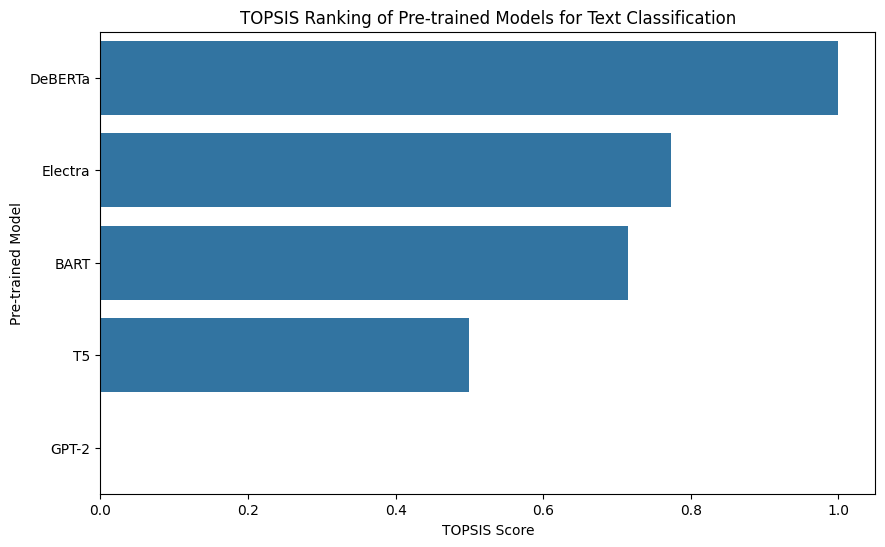

TOPSIS ranking completed and results saved.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data: New pre-trained models with performance metrics
data = {
    'Model': ['T5', 'GPT-2', 'BART', 'Electra', 'DeBERTa'],
    'Accuracy': [0.92, 0.88, 0.91, 0.89, 0.93],
    'Precision': [0.91, 0.86, 0.90, 0.88, 0.94],
    'Recall': [0.90, 0.87, 0.92, 0.88, 0.92],
    'Inference Time (ms)': [130, 150, 125, 110, 95],
    'Parameter Count (M)': [220, 355, 140, 135, 100]
}

df = pd.DataFrame(data)

# Define benefit (+) and cost (-) criteria
criteria = {'Accuracy': '+', 'Precision': '+', 'Recall': '+', 'Inference Time (ms)': '-', 'Parameter Count (M)': '-'}

# Assign weights (higher weight for Accuracy & Precision)
weights = {'Accuracy': 0.3, 'Precision': 0.25, 'Recall': 0.2, 'Inference Time (ms)': 0.15, 'Parameter Count (M)': 0.1}

# Normalize the data with weights
normalized_df = df.copy()
for col in criteria:
    if criteria[col] == '+':
        normalized_df[col] = (df[col] / np.sqrt((df[col]**2).sum())) * weights[col]
    else:
        normalized_df[col] = (1 - (df[col] / np.sqrt((df[col]**2).sum()))) * weights[col]

# Calculate ideal best and worst
ideal_best = normalized_df.iloc[:, 1:].max().values
ideal_worst = normalized_df.iloc[:, 1:].min().values

distance_best = np.sqrt(((normalized_df.iloc[:, 1:].values - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((normalized_df.iloc[:, 1:].values - ideal_worst) ** 2).sum(axis=1))

topsis_score = distance_worst / (distance_best + distance_worst)

df['TOPSIS Score'] = topsis_score
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

# Save results to CSV
df.to_csv("topsis_results.csv", index=False)

# Plot rankings
plt.figure(figsize=(10, 6))
sns.barplot(x=df['TOPSIS Score'], y=df['Model'], order=df.sort_values('TOPSIS Score', ascending=False)['Model'])
plt.xlabel("TOPSIS Score")
plt.ylabel("Pre-trained Model")
plt.title("TOPSIS Ranking of Pre-trained Models for Text Classification")
plt.savefig("topsis_ranking.png")
plt.show()

print("TOPSIS ranking completed and results saved.")
